In [1]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA

In [2]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
winSize = (50,50)
blockSize = (5,5)
blockStride = (5,5)
cellSize = (5,5)
nbins = 9

In [4]:
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
#WinSize, BlockSize, BlockStride, CellSize, NBins

char_id = os.listdir('./Thai44Consonants/Train/')
label_train = np.zeros(1)
count =0

for i in range(len(char_id)):
    print(str(i)+'/'+str(len(char_id)), end="\r")
    num_char_id = os.listdir('./Thai44Consonants/Train/'+str(char_id[i]))
    for j in range(len(num_char_id)):
        im = cv2.imread('./Thai44Consonants/Train/'+str(char_id[i])+'/'+str(num_char_id[j]))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (50, 50))
        im = cv2.GaussianBlur(im, (3, 3), 0)
        h = hog.compute(im)
        if count == 0:
            features_train = h.reshape(1,-1)
            label_train = int(char_id[i])
        else:
            features_train = np.concatenate((features_train,h.reshape(1,-1)),axis = 0)
            label_train = np.append(label_train,int(char_id[i]))
        count = count+1

In [5]:
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
#WinSize, BlockSize, BlockStride, CellSize, NBins

char_id = os.listdir('./Thai44Consonants/Test/')
label_test = np.zeros(1)
count =0

for i in range(len(char_id)):
    print(str(i)+'/'+str(len(char_id)), end="\r")
    num_char_id = os.listdir('./Thai44Consonants/Test/'+str(char_id[i]))
    for j in num_char_id:
        im = cv2.imread('./Thai44Consonants/Test/'+str(char_id[i])+'/'+j)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (50, 50))
        im = cv2.GaussianBlur(im, (3, 3), 0)
        h = hog.compute(im)
        if count == 0:
            features_test = h.reshape(1,-1)
            label_test = int(char_id[i])
        else:
            features_test = np.concatenate((features_test,h.reshape(1,-1)),axis = 0)
            label_test = np.append(label_test,int(char_id[i]))
        count = count+1

In [26]:
minn = pd.DataFrame(X.min(axis = 0)) .transpose() 
maxx = pd.DataFrame(X.max(axis = 0)) .transpose() 

In [41]:
X = (pd.DataFrame(features_train)- pd.DataFrame(features_train).min())/(pd.DataFrame(features_train).max() - pd.DataFrame(features_train).min())
X_test = (pd.DataFrame(features_test)- pd.DataFrame(features_train).min())/(pd.DataFrame(features_train).max() - pd.DataFrame(features_train).min())

In [10]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(features_train)
# X = scaler.transform(features_train)
# y = label_train
# X_test = scaler.transform(features_test)
# y_test = label_test

In [11]:
X = features_train
y = label_train
X_test = features_test
y_test = label_test

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

0 : 0.46459298477829253
Confusion matrix, without normalization
[[32  1  0 ...  0  0  0]
 [ 2 18  3 ...  0  1  0]
 [ 2  5 21 ...  0  0  0]
 ...
 [ 0  1  0 ... 22  0  1]
 [ 8  1  0 ...  0  9  0]
 [ 0  1  2 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.15      0.94      0.26        34
           1       0.26      0.55      0.36        33
           2       0.50      0.60      0.55        35
           3       0.67      0.11      0.20        35
           4       0.75      0.62      0.68        34
           5       0.71      0.59      0.65        34
           6       0.88      0.40      0.55        35
           7       0.67      0.12      0.20        34
           8       0.76      0.54      0.63        35
           9       0.60      0.09      0.15        35
          10       0.39      0.46      0.42        35
          11       0.58      0.63      0.60        35
          12       0.61      0.89      0.72        35
          13       0.48

c:\users\thanakom_hatsadeang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.13      0.97      0.23        34
           1       0.25      0.70      0.37        33
           2       0.35      0.54      0.43        35
           3       1.00      0.17      0.29        35
           4       0.59      0.59      0.59        34
           5       0.80      0.47      0.59        34
           6       0.86      0.34      0.49        35
           7       1.00      0.09      0.16        34
           8       0.89      0.46      0.60        35
           9       0.75      0.09      0.15        35
          10       0.44      0.49      0.46        35
          11       0.52      0.63      0.57        35
          12       0.45      0.94      0.61        35
          13       0.39      0.71      0.50        34
          14       0.44      0.31      0.37        35
          15       0.91      0.29      0.43        35
          16       0.37      0.80      0.51        35
          17       0.62    

5 : 0.4493712772998015
Confusion matrix, without normalization
[[33  0  0 ...  0  0  0]
 [ 1 23  1 ...  0  0  0]
 [ 0 12 16 ...  0  0  0]
 ...
 [ 0  1  0 ... 20  0  0]
 [ 6  0  0 ...  0  6  0]
 [ 0  2  0 ...  0  0 10]]


c:\users\thanakom_hatsadeang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.15      0.97      0.26        34
           1       0.27      0.70      0.39        33
           2       0.59      0.46      0.52        35
           3       0.44      0.11      0.18        35
           4       0.60      0.76      0.68        34
           5       0.58      0.56      0.57        34
           6       1.00      0.26      0.41        35
           7       0.62      0.15      0.24        34
           8       0.91      0.57      0.70        35
           9       0.75      0.09      0.15        35
          10       0.41      0.40      0.41        35
          11       0.56      0.57      0.56        35
          12       0.52      1.00      0.69        35
          13       0.44      0.68      0.53        34
          14       0.60      0.26      0.36        35
          15       0.92      0.31      0.47        35
          16       0.35      0.77      0.48        35
          17       0.54    

c:\users\thanakom_hatsadeang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.15      0.97      0.26        34
           1       0.25      0.61      0.35        33
           2       0.51      0.51      0.51        35
           3       1.00      0.23      0.37        35
           4       0.46      0.88      0.61        34
           5       0.57      0.47      0.52        34
           6       0.88      0.40      0.55        35
           7       0.67      0.12      0.20        34
           8       0.86      0.51      0.64        35
           9       0.60      0.17      0.27        35
          10       0.46      0.34      0.39        35
          11       0.60      0.69      0.64        35
          12       0.49      0.94      0.64        35
          13       0.42      0.50      0.46        34
          14       0.56      0.40      0.47        35
          15       0.80      0.23      0.36        35
          16       0.37      0.60      0.46        35
          17       0.56    

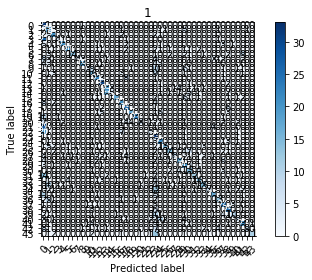

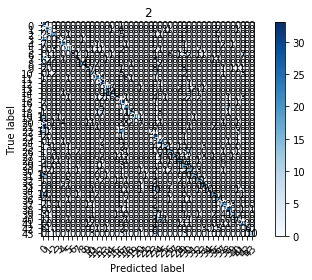

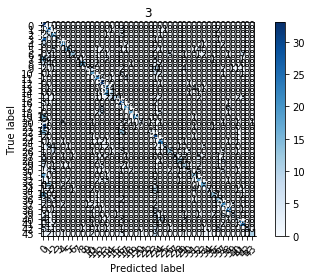

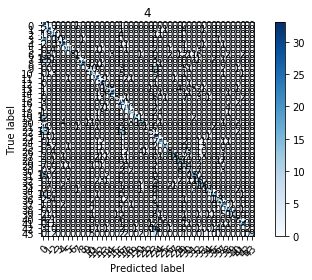

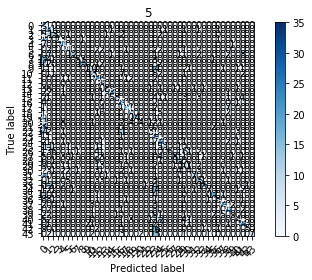

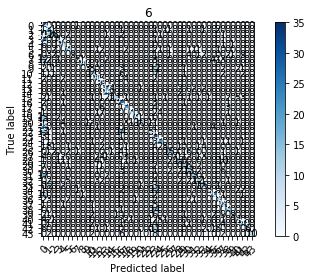

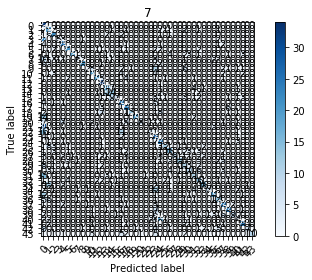

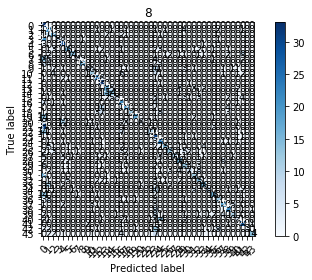

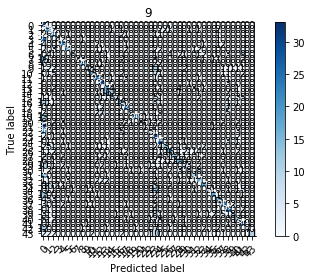

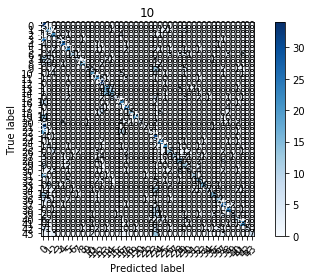

In [45]:
last_best_acc = 0
mlp = MLPClassifier(activation='logistic',  max_iter=1000,verbose=False)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
count = 0
scores = []
for train_index, test_index in cv.split(X):
    X_train, y_train = X.iloc[train_index], y[train_index]
    mlp.fit(X_train, y_train)
    scr = mlp.score(X_test, y_test)
    print(str(count)+" : "+str(scr))
    if(scr > last_best_acc):
        best_model = mlp
        last_best_acc = scr
    scores.append(scr)
    count = count+1
    plot_confusion_matrix(y_test, mlp.predict(X_test),
                      title=str(count))
    print(metrics.classification_report(y_test, mlp.predict(X_test)))

In [53]:
bt = pd.read_csv('data_thaich_test_gray.csv')
ft = pd.DataFrame(features_test)

In [73]:
bt[bt.columns[:-1]].equals(ft)

False

In [75]:
bt

,bin 1,bin 2,bin 3,bin 4,bin 5,bin 6,bin 7,bin 8,bin 9,bin 10,...,bin 892,bin 893,bin 894,bin 895,bin 896,bin 897,bin 898,bin 899,bin 900,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ก


In [60]:
np.unique(ft.iloc[0])

array([0.00000000e+00, 1.71285603e-04, 7.02913676e-04, 8.70835793e-04,
       1.64706714e-03, 1.88077393e-03, 1.92824926e-03, 2.27339217e-03,
       2.40501645e-03, 2.44627311e-03, 2.64516892e-03, 2.84174853e-03,
       2.84495112e-03, 3.14046768e-03, 3.20495386e-03, 3.24388500e-03,
       3.53736873e-03, 3.61676794e-03, 3.69999604e-03, 3.83064500e-03,
       4.29072836e-03, 4.65774629e-03, 5.81454579e-03, 5.96769527e-03,
       6.32779719e-03, 6.54721633e-03, 6.61584269e-03, 6.80285599e-03,
       7.08923489e-03, 7.18813855e-03, 7.27734854e-03, 8.42230301e-03,
       8.50356277e-03, 9.28701553e-03, 9.83732101e-03, 1.00476220e-02,
       1.02765765e-02, 1.13642495e-02, 1.25720473e-02, 1.34928413e-02,
       1.37333181e-02, 1.41632976e-02, 1.44805359e-02, 1.61108356e-02,
       1.71523523e-02, 1.73667353e-02, 1.88548639e-02, 1.93683449e-02,
       2.08263583e-02, 2.13252865e-02, 2.15096269e-02, 2.25226972e-02,
       2.25321669e-02, 2.52027456e-02, 2.54868325e-02, 2.58330163e-02,
      